[*********************100%***********************]  10 of 10 completed



========== OPTIMAL PORTFOLIO ALLOCATION ==========
           Stock  Weight  Investment_₹
0    RELIANCE.NS  0.2500     2500000.0
1         TCS.NS  0.0000           0.0
2        INFY.NS  0.0000           0.0
3    HDFCBANK.NS  0.2351     2351222.0
4   ICICIBANK.NS  0.0000           0.0
5         ITC.NS  0.2500     2500000.0
6          LT.NS  0.2149     2148865.0
7        SBIN.NS  0.0000           0.0
8  HINDUNILVR.NS  0.0500      499914.0
9  BHARTIARTL.NS  0.0000           0.0

========== PORTFOLIO PERFORMANCE ==========
Annual Return: 0.274
Annual Volatility: 0.149
Sharpe Ratio: 1.44


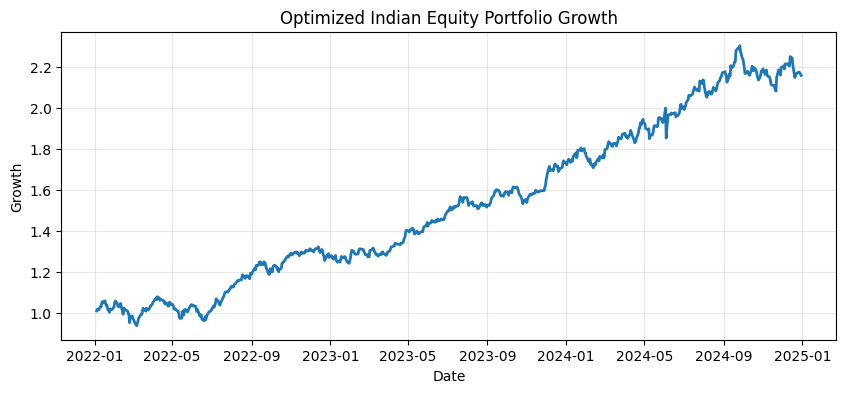


========== 10-DAY RETURN FORECAST (ARIMA) ==========
737    0.00143
738    0.00105
739    0.00109
740    0.00109
741    0.00109
742    0.00109
743    0.00109
744    0.00109
745    0.00109
746    0.00109
Name: predicted_mean, dtype: float64


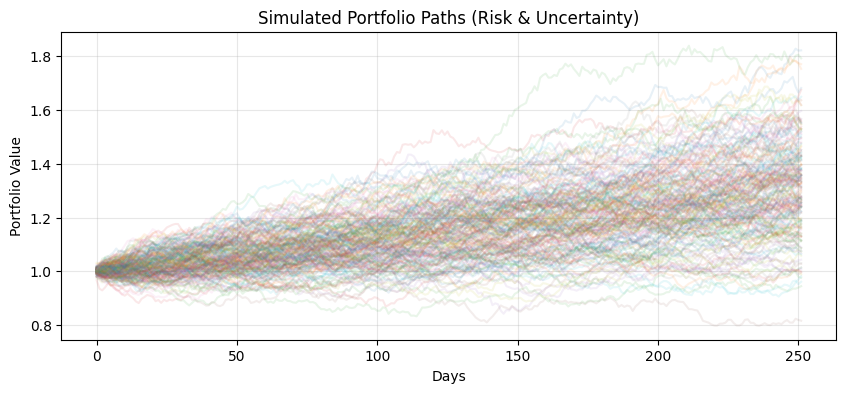


========== ANALYTICAL INSIGHTS ==========
• Optimization allocates capital efficiently, not predict prices.
• Forecasting helps expectation setting, not guaranteed profit.
• Simulation reveals dispersion and tail risk.
• Profit comes from risk control and diversification.


In [1]:
# ============================================================
# INDIAN EQUITY PORTFOLIO CONSTRUCTION & OPTIMIZATION
# Capital: ₹10,000,000
# Objective: Understand how analytics & forecasting aid profits
# ============================================================

# -------------------- LIBRARIES --------------------
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# -------------------- PARAMETERS --------------------
CAPITAL = 10_000_000          # ₹10 million
RISK_FREE_RATE = 0.06         # 6%
START_DATE = "2022-01-01"
END_DATE = "2024-12-31"

STOCKS = [
    "RELIANCE.NS", "TCS.NS", "INFY.NS", "HDFCBANK.NS",
    "ICICIBANK.NS", "ITC.NS", "LT.NS", "SBIN.NS",
    "HINDUNILVR.NS", "BHARTIARTL.NS"
]

# ============================================================
# 1. DATA DOWNLOAD
# ============================================================

prices = yf.download(STOCKS, start=START_DATE, end=END_DATE)["Close"]
returns = prices.pct_change().dropna()

# ============================================================
# 2. EXPECTED RETURNS & RISK
# ============================================================

mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

# ============================================================
# 3. PORTFOLIO OPTIMIZATION (MAX SHARPE)
# ============================================================

def portfolio_performance(weights):
    port_return = np.dot(weights, mean_returns)
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return port_return, port_vol

def negative_sharpe(weights):
    ret, vol = portfolio_performance(weights)
    return -(ret - RISK_FREE_RATE) / vol

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 0.25) for _ in STOCKS)
init_weights = np.array(len(STOCKS) * [1 / len(STOCKS)])

opt = minimize(
    negative_sharpe,
    init_weights,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

weights = opt.x

# ============================================================
# 4. CAPITAL ALLOCATION
# ============================================================

allocation = pd.DataFrame({
    "Stock": STOCKS,
    "Weight": np.round(weights, 4),
    "Investment_₹": np.round(weights * CAPITAL, 0)
})

print("\n========== OPTIMAL PORTFOLIO ALLOCATION ==========")
print(allocation)

# ============================================================
# 5. PORTFOLIO PERFORMANCE
# ============================================================

portfolio_returns = returns.dot(weights)
equity_curve = (1 + portfolio_returns).cumprod()

annual_return = portfolio_returns.mean() * 252
annual_vol = portfolio_returns.std() * np.sqrt(252)
sharpe_ratio = (annual_return - RISK_FREE_RATE) / annual_vol

print("\n========== PORTFOLIO PERFORMANCE ==========")
print("Annual Return:", round(annual_return, 3))
print("Annual Volatility:", round(annual_vol, 3))
print("Sharpe Ratio:", round(sharpe_ratio, 2))

# ============================================================
# 6. EQUITY CURVE
# ============================================================

plt.figure(figsize=(10, 4))
plt.plot(equity_curve, linewidth=2)
plt.title("Optimized Indian Equity Portfolio Growth")
plt.xlabel("Date")
plt.ylabel("Growth")
plt.grid(alpha=0.3)
plt.show()

# ============================================================
# 7. FORECASTING (ARIMA – EXPECTATION, NOT PREDICTION)
# ============================================================

arima_model = ARIMA(portfolio_returns, order=(1, 0, 1))
arima_fit = arima_model.fit()
forecast_returns = arima_fit.forecast(steps=10)

print("\n========== 10-DAY RETURN FORECAST (ARIMA) ==========")
print(np.round(forecast_returns, 5))

# ============================================================
# 8. SIMULATION (UNCERTAINTY ANALYSIS)
# ============================================================

simulated_paths = []

for i in range(200):
    simulated_daily_returns = np.random.normal(
        portfolio_returns.mean(),
        portfolio_returns.std(),
        252
    )
    simulated_paths.append((1 + simulated_daily_returns).cumprod())

plt.figure(figsize=(10, 4))
for path in simulated_paths:
    plt.plot(path, alpha=0.1)
plt.title("Simulated Portfolio Paths (Risk & Uncertainty)")
plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.grid(alpha=0.3)
plt.show()

# ============================================================
# 9. KEY INTERPRETATION OUTPUT
# ============================================================

print("\n========== ANALYTICAL INSIGHTS ==========")
print("• Optimization allocates capital efficiently, not predict prices.")
print("• Forecasting helps expectation setting, not guaranteed profit.")
print("• Simulation reveals dispersion and tail risk.")
print("• Profit comes from risk control and diversification.")

# ============================================================
# END OF FILE
# ============================================================
